<a href="https://colab.research.google.com/github/pemba007/motor-ml/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./accelerometer.csv')

In [2]:
df.shape

(153000, 5)

In [3]:
# Remove later

# df = df.iloc[:1000,:]

In [4]:
df.shape

(153000, 5)

In [5]:
df.describe()

,wconfid,pctid,x,y,z
count,153000.000000,153000.000000,153000.000000,153000.000000,153000.000000
mean,2.000000,60.000000,0.995622,0.005351,-0.117769
std,0.816499,24.494977,0.773958,0.742602,0.517008
min,1.000000,20.000000,-8.000000,-8.000000,-5.867000
25%,1.000000,40.000000,0.945000,-0.078000,-0.172000
50%,2.000000,60.000000,0.992000,0.008000,-0.125000
75%,3.000000,80.000000,1.039000,0.105000,-0.066000
max,3.000000,100.000000,7.996000,7.996000,6.086000


# New Section

In [6]:
# Unique values in wconfid, pctid
print("Unique values in wconfid", df['wconfid'].unique())
print("Unique values in pctid", df['pctid'].unique())

Unique values in wconfid [1 2 3]
Unique values in pctid [ 20  25  30  35  40  45  50  55  60  65  70  75  80  85  90  95 100]


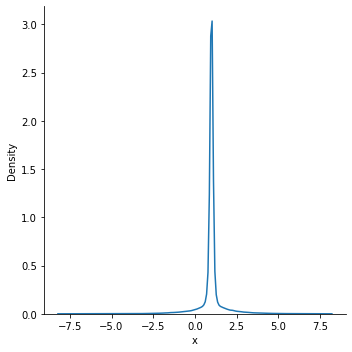

In [7]:
sns.displot(x = df['x'], kind='kde')

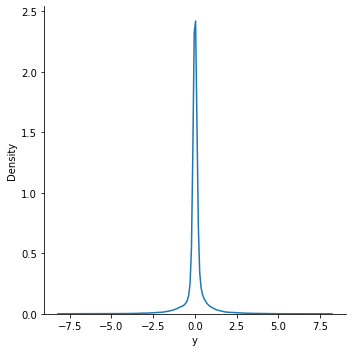

In [8]:
sns.displot(x = df['y'], kind='kde')

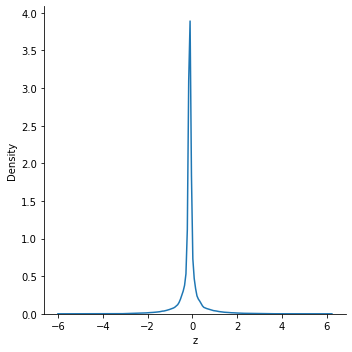

In [9]:
sns.displot(x = df['z'], kind='kde')

In [10]:
# Separating target variable
y = df['wconfid']
df.drop(columns=['wconfid'], inplace=True)

# Implementing ANN with 5 fold

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, RocCurveDisplay, classification_report, auc, f1_score, multilabel_confusion_matrix,roc_curve, roc_auc_score

skf = StratifiedKFold(n_splits=5)

classifier = OneVsRestClassifier(
    MLPClassifier(max_iter=50)
)

conf_matrixes = list()

accuracy_scores = list()

actual_classes = np.empty([0], dtype=int)
predicted_classes = np.empty([0], dtype=int)

all_fprs = list()
all_tprs = list()
all_roc_aucs = list()

# for train_index, test_index in skf.split(df, y):
for k, (train_index, test_index) in enumerate(skf.split(df, y)):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df.iloc[train_index,:], df.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    y_train = label_binarize(y_train, classes=[1, 2, 3])
    y_test = label_binarize(y_test, classes=[1, 2, 3])

    n_classes = y_train.shape[1]

    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    y_score = y_pred

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    all_fprs.append(fpr)
    all_tprs.append(tpr)
    all_roc_aucs.append(roc_auc)
    
    # Calculating accuracy score
    accuracy_scores.append(accuracy_score(y_test, y_pred))

    # Calculating confusion matrix
    cmf = multilabel_confusion_matrix(y_test, y_pred)
    conf_matrixes.append(cmf)

    actual_classes = np.append(actual_classes, y_test)
    predicted_classes = np.append(predicted_classes, y_pred)

    # Calculating values for the ROC Curve
    

TRAIN: [ 10200  10201  10202 ... 152997 152998 152999] TEST: [     0      1      2 ... 112197 112198 112199]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


TRAIN: [     0      1      2 ... 152997 152998 152999] TEST: [ 10200  10201  10202 ... 122397 122398 122399]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


TRAIN: [     0      1      2 ... 152997 152998 152999] TEST: [ 20400  20401  20402 ... 132597 132598 132599]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


TRAIN: [     0      1      2 ... 152997 152998 152999] TEST: [ 30600  30601  30602 ... 142797 142798 142799]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


TRAIN: [     0      1      2 ... 142797 142798 142799] TEST: [ 40800  40801  40802 ... 152997 152998 152999]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Creating ROC graphs

In [17]:
# Creating values for each classes

class_1_fpr = list()
class_2_fpr = list()
class_3_fpr = list()

class_1_tpr = list()
class_2_tpr = list()
class_3_tpr = list()

class_1_roc_auc = list()
class_2_roc_auc = list()
class_3_roc_auc = list()

for x in range(5):
  class_1_fpr.append(all_fprs[x][0])
  class_2_fpr.append(all_fprs[x][1])
  class_3_fpr.append(all_fprs[x][2])

  class_1_tpr.append(all_tprs[x][0])
  class_2_tpr.append(all_tprs[x][1])
  class_3_tpr.append(all_tprs[x][2])

  class_1_roc_auc.append(all_roc_aucs[x][0])
  class_2_roc_auc.append(all_roc_aucs[x][1])
  class_3_roc_auc.append(all_roc_aucs[x][2])

In [22]:
class_1_tpr

[array([0.        , 0.00921569, 1.        ]),
 array([0.       , 0.0354902, 1.       ]),
 array([0.        , 0.41460784, 1.        ]),
 array([0.        , 0.54598039, 1.        ]),
 array([0.        , 0.49990196, 1.        ])]

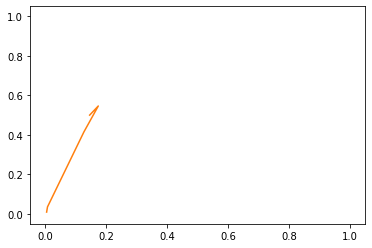

In [34]:
plt.plot(class_1_fpr, class_1_tpr)
plt.show()

ValueError: ignored

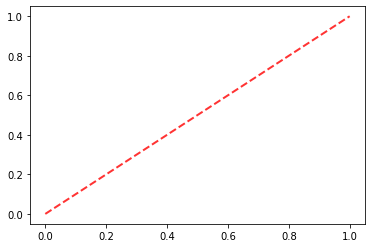

In [24]:
fig, ax = plt.subplots()
mean_fpr = np.linspace(0, 1, 100)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

# mean_tpr = np.mean(class_1_tpr, axis=0)
# mean_tpr[-1] = 1.0
# print(mean_fpr)
# print(mean_tpr)
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(class_1_roc_auc)
# ax.plot(
#     mean_fpr,
#     mean_tpr,
#     color="b",
#     label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
#     lw=2,
#     alpha=0.8,
# )

std_tpr = np.std(class_1_tpr, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [12]:
# cm = multilabel_confusion_matrix(actual_classes, predicted_classes)

# res = []

# for l in [0,1,2]:
#     x = cm[l]
#     tn, fp = x[0]
#     fn, tp = x[1]
#     sensitivity = tp / (tp + fn)
#     specificity = tn / (tn + fp)
#     precision = tp / (tp + fp)
#     f1 = (2 * precision * sensitivity) / (precision + sensitivity)
#     res.append([l,sensitivity, specificity, f1])

# frame = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

# total_accuracy = accuracy_score(actual_classes, predicted_classes)
# print("The total accuracy is", total_accuracy)

IndexError: ignored

In [ ]:
print(frame)